In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [3]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [n * 2 * np.pi / N  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [4]:
def show_opsims(dbDir):
    '''Show available opsim databases in the provided directory.

    Args:
        dbDir(str): The path the database directory.
    '''

    dbDir = os.path.abspath(dbDir)
    db_list = glob.glob(dbDir+'/*.db')
    runNames = [os.path.splitext(os.path.basename(x))[0] for x in db_list]

    return runNames


In [5]:
def scale(arr, mode=0):
    """scale array by max or scale to 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [6]:
# name of opsims
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases


# v1.5  86
# v1.6  30 
# v1.7 74

runNames = show_opsims(dbpath)

runNames.sort()

In [7]:
# prepare proper motion dataframe from scores

#df_score_CI = pd.read_csv('./data/Score_CI.csv', skiprows=1, names=['score_CI'])
#df_score_LS = pd.read_csv('./data/Score_LS.csv', skiprows=1, names=['score_LS'])
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', skiprows=1, names=['score_PMT'])

#df_score_CI = pd.read_csv('./data/Score_CI.csv', index_col=0)
#df_score_LS = pd.read_csv('./data/Score_LS.csv', index_col=0)
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', index_col=0)

#df_properMotion = pd.DataFrame()

#df_properMotion['db'] = runNames
#df_properMotion['db'] = df_score_CI.db
#df_properMotion['FoM_CI'] = df_score_CI.fom
#df_properMotion['FoM_LS'] = df_score_LS.fom
#df_properMotion['FoM_PMT'] = df_score_PMT.fom

#df_properMotion.sort_values(by='db', inplace=True)
#df_properMotion.to_csv('./data/df_properMotion.csv', index=False)

In [99]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

#cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

In [106]:
df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_wfd.csv')
df_nfields = pd.read_csv('./data_v1_5/df_Nfields_wfd.csv')
df_nstars = pd.read_csv('./data_v1_5/df_Nstars_wfd.csv')
df_depth = pd.read_csv('./data_v1_5/df_depth_wfd.csv')


In [107]:
# normalize
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_tgaps[col] = scale(df_tgaps[col])
    df_nfields[col] = scale(df_nfields[col])
    df_nstars[col] = scale(df_nstar[col])

for col in filters:
    df_depth[col] = scale(df_depth[col], mode=1)

df_tgaps['total_same'] = scale( np.sum(df_tgaps[ cols_same ], axis=1) )
df_tgaps['total_diff'] = scale( np.sum(df_tgaps[ cols_diff ], axis=1) )
df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
df_nstars['total'] = scale( np.sum(df_nstar[ cols_all ], axis=1) )
df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )


In [108]:
df_radar = pd.DataFrame()
df_radar['db'] = runNames

df_radar['FoM_tgaps_same'] = df_tgaps['total_same'] 
df_radar['FoM_tgaps_diff'] = df_tgaps['total_diff'] 

df_radar['FoM_EG'] = df_nfields['total']
df_radar['FoM_Gal'] = df_nstars['total']
df_radar['FoM_depth'] = df_depth['total']
df_radar.to_csv('./data_v1_5/df_radar_wfd.csv', index=False)

In [65]:
#df_radar = pd.read_csv('./data/df_radar.csv')

In [95]:
df_radar.head()

,db,FoM_tgaps_same,FoM_tgaps_diff,FoM_EG,FoM_Gal,FoM_depth
0,agnddf_v1.5_10yrs,0.132988,0.503818,0.564762,0.587077,0.931742
1,alt_dust_v1.5_10yrs,0.133044,0.703636,0.554701,0.304529,0.800220
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.138956,0.795575,0.644424,0.333097,0.692088
3,baseline_2snaps_v1.5_10yrs,0.135375,0.461125,0.330473,0.341037,0.863893
4,baseline_samefilt_v1.5_10yrs,0.206479,0.190582,0.357034,0.312804,0.866805


In [96]:
df_radar.sort_values(by=['FoM_tgaps_diff'], ascending=False)[:4]

,db,FoM_tgaps_same,FoM_tgaps_diff,FoM_EG,FoM_Gal,FoM_depth
51,rolling_mod6_sdf_0.10_v1.5_10yrs,0.241430,1.000000,0.850728,0.729922,0.674592
52,rolling_mod6_sdf_0.20_v1.5_10yrs,0.230857,0.987593,0.807549,0.729374,0.697906
55,short_exp_5ns_1expt_v1.5_10yrs,1.000000,0.884054,1.000000,1.000000,0.358649
56,short_exp_5ns_5expt_v1.5_10yrs,0.646799,0.843458,0.973913,0.963744,0.412604


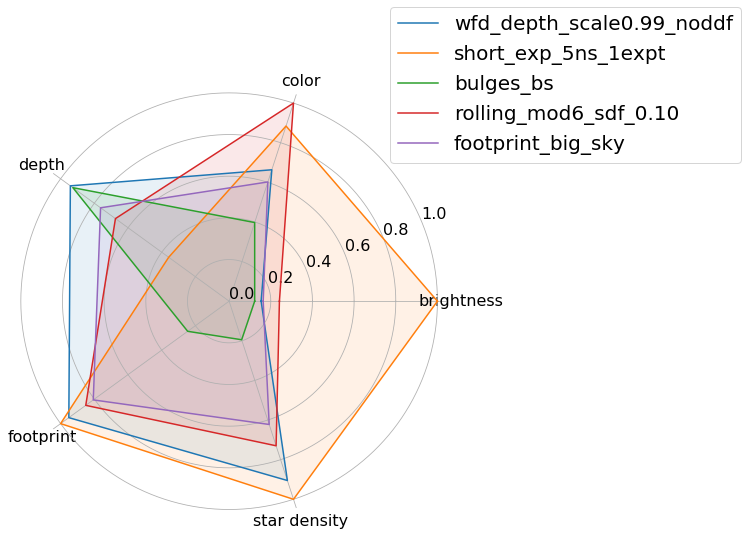

In [118]:
dbnames = [ #'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           #'twilight_neo_mod1_v1.5_10yrs',
           #'wfd_depth_scale0.99_v1.5_10yrs'
          'wfd_depth_scale0.99_noddf_v1.5_10yrs',
           'short_exp_5ns_1expt_v1.5_10yrs',
           'bulges_bs_v1.5_10yrs',
           'rolling_mod6_sdf_0.10_v1.5_10yrs',
           'footprint_big_skyv1.5_10yrs'  
          ]

FoMvars = ['FoM_tgaps_same', 'FoM_tgaps_diff', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]

#FoMvars = ['FoM_tgapsEvol', 'FoM_tgapsCol', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

FoMvarsnames = ['brightness', "color", "depth", "footprint", "star density"]#,
ax.set_xticklabels(FoMvarsnames, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.2))

plt.savefig("figures/radar_wfd.pdf", bbox_inches='tight')

### parallel coord plot

In [18]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}


In [19]:
def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]

In [20]:
df_radar['family'] = df_radar.apply(get_family, axis=1)



In [21]:
df_radar.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [22]:
colorlist = [ family2color[i] for i in df_radar.family.values ]

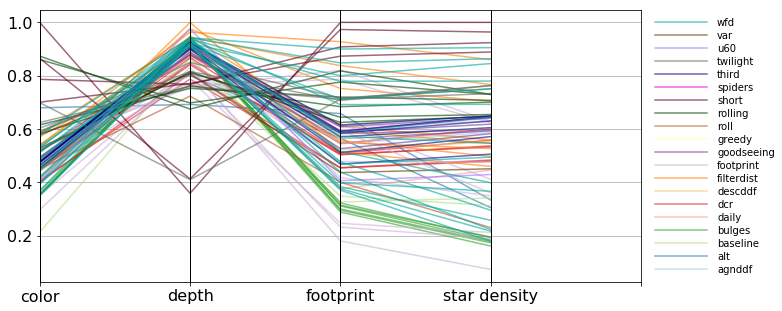

In [24]:
fig = plt.figure(figsize=(12,5))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]

ax = pd.plotting.parallel_coordinates(
    df_radar, "db", FoMvars, color=colorlist, alpha=0.6)

plt.xticks([0,1,2,3,4], labels=["color", "depth", "footprint", "star density"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
#plt.savefig('figures/opsimParallelCoord.pdf')
